# Predicting galaxy redshift from band magnitudes with XGBoost

Zooey Nguyen

2021-07-01

- 2021-07-06: Update with photoz_utils

- 2021-07-08: Update with density estimation

- 2021-07-16: Update with photoz_metrics and v3 crossmatched data

- 2021-07-20: Update with new photoz_metrics metrics outputs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from photoz_metrics import *
from photoz_utils import *

## Setup data

In [4]:
df = import_photoz_data('/data/HSC/HSC_v3/trimmed_forced_forced2_spec_z_matched_online.csv')
df = clean_photoz_data(df)
X_train, X_test, y_train, y_test = split_photoz_data(df)
df

,g_mag,r_mag,i_mag,z_mag,y_mag,zspec
1,21.735455,21.091333,20.344463,20.022955,19.956047,2.18990
2,21.779919,21.001816,20.700275,20.562370,20.465494,0.05522
3,22.846054,21.378252,19.988840,19.455887,19.151213,0.77590
4,22.864800,21.190277,20.361565,19.964561,19.708752,0.44150
5,21.878937,21.425276,21.239027,21.169462,21.168419,0.18440
...,...,...,...,...,...,...
129896,23.842861,23.231312,22.365879,22.095644,22.092629,0.85800
129897,23.074793,22.254620,21.639031,21.444776,21.341650,0.66670
129898,23.593109,22.241854,21.101269,20.645126,20.344555,0.54340
129899,23.615334,22.248329,21.106613,20.645607,20.348583,0.54340


## Train XGBoost regression

In [4]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=32, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Evaluate training point estimates

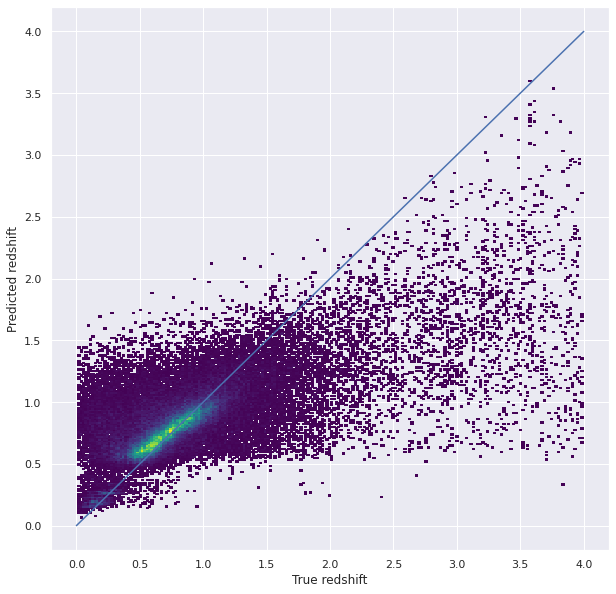

In [5]:
y_train_pred = xgb_model.predict(X_train)
y_train_pred = pd.Series(y_train_pred, index=y_train.index)
plot_predictions(y_train_pred, y_train)

In [6]:
metrics_agg = get_point_metrics(y_train_pred, y_train)
metrics_binned = get_point_metrics(y_train_pred, y_train, binned=True)
metrics_binned

,zspec_bin,count,L,bias_bw,bias_conv,scatter_bw,scatter_conv,outlier_bw,outlier_conv
0,"(0.0, 0.2]",4681,0.597067,0.352093,0.336844,0.324598,0.400452,0.024354,0.595386
1,"(0.2, 0.4]",7440,0.598534,0.245949,0.237476,0.218888,0.216896,0.045296,0.688710
2,"(0.4, 0.6]",18886,0.306465,0.080303,0.080779,0.076062,0.064770,0.128349,0.229059
3,"(0.6, 0.8]",24556,0.141047,0.026944,0.027891,0.054767,0.047037,0.107876,0.079980
4,"(0.8, 1.0]",19294,0.111633,-0.010790,-0.010131,0.052687,0.044394,0.103815,0.048875
5,"(1.0, 1.2]",9563,0.199029,-0.049063,-0.049275,0.071418,0.058044,0.090662,0.101433
6,"(1.2, 1.4]",4143,0.344427,-0.099024,-0.093605,0.105647,0.099881,0.040792,0.311851
7,"(1.4, 1.6]",2573,0.472306,-0.156026,-0.150562,0.114949,0.117588,0.022930,0.504858
8,"(1.6, 1.8]",1711,0.554094,-0.194281,-0.191089,0.112887,0.115675,0.022794,0.651081
9,"(1.8, 2.0]",1145,0.640851,-0.236834,-0.232220,0.119050,0.123973,0.026201,0.765939


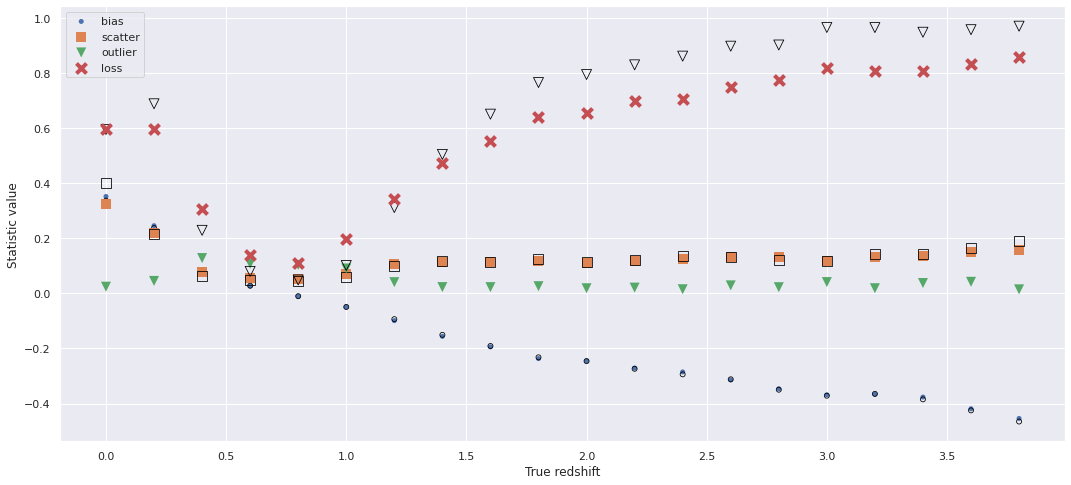

In [7]:
plot_point_metrics(metrics_binned)

## Evaluate test point estimates

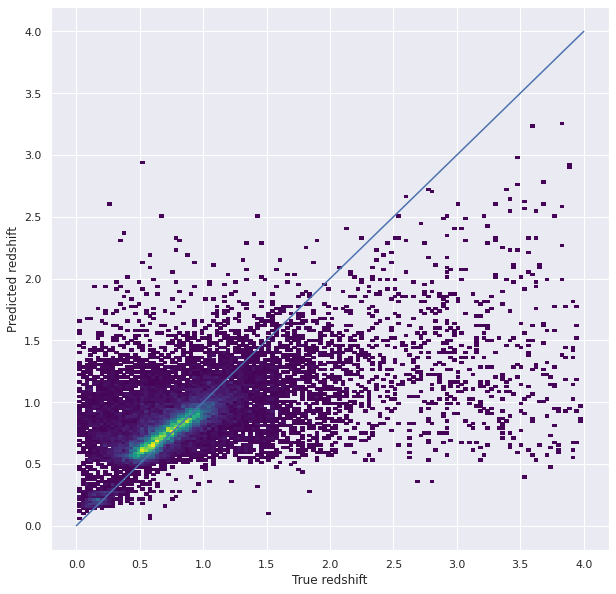

In [10]:
y_test_pred = xgb_model.predict(X_test)
y_test_pred = pd.Series(y_test_pred, index=y_test.index)
plot_predictions(y_test_pred, y_test)

In [18]:
metrics_agg = get_point_metrics(y_test_pred, y_test)
metrics_binned = get_point_metrics(y_test_pred, y_test, binned=True)
metrics_binned

,zspec_bin,count,L,bias_bw,bias_conv,scatter_bw,scatter_conv,outlier_bw,outlier_conv
0,"(0.0, 0.2]",1158,0.610928,0.389147,0.363697,0.371280,0.447006,0.026770,0.602763
1,"(0.2, 0.4]",1814,0.620497,0.260155,0.251286,0.242214,0.224447,0.057332,0.703969
2,"(0.4, 0.6]",4644,0.319817,0.080920,0.082308,0.079537,0.066105,0.138674,0.252153
3,"(0.6, 0.8]",6131,0.144069,0.026146,0.027516,0.054001,0.045933,0.117273,0.085141
4,"(0.8, 1.0]",4958,0.115698,-0.011493,-0.010377,0.051875,0.043905,0.109117,0.053651
5,"(1.0, 1.2]",2339,0.224698,-0.053391,-0.051705,0.078711,0.064481,0.087644,0.133818
6,"(1.2, 1.4]",1027,0.373479,-0.106448,-0.100255,0.113446,0.110961,0.037001,0.351509
7,"(1.4, 1.6]",709,0.518839,-0.174996,-0.174059,0.121615,0.124853,0.049365,0.576869
8,"(1.6, 1.8]",404,0.567575,-0.204565,-0.204563,0.128665,0.135601,0.019802,0.663366
9,"(1.8, 2.0]",301,0.666160,-0.253009,-0.249842,0.120305,0.127577,0.029900,0.790698


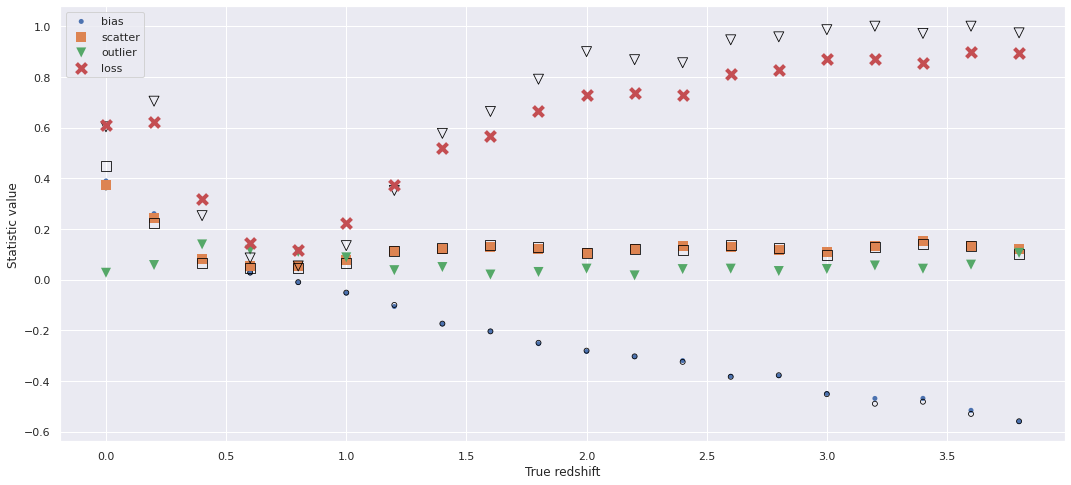

In [19]:
plot_point_metrics(metrics_binned)